In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 83s 0us/step


In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

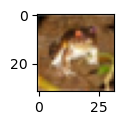

In [13]:
plot_sample(0)

In [11]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
32*32*3

3072

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.fit(X_train_scaled, y_train, epochs=10)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3075 - loss: 1.9284
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4226 - loss: 1.6421
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4520 - loss: 1.5495
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4749 - loss: 1.4920
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4968 - loss: 1.4321
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5080 - loss: 1.4022
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5233 - loss: 1.3563
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5421 - loss: 1.3148
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5514 - loss: 1.2787
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5653 - loss: 1.2467


In [27]:
model.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4802 - loss: 1.4614


[1.4708306789398193, 0.4754999876022339]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

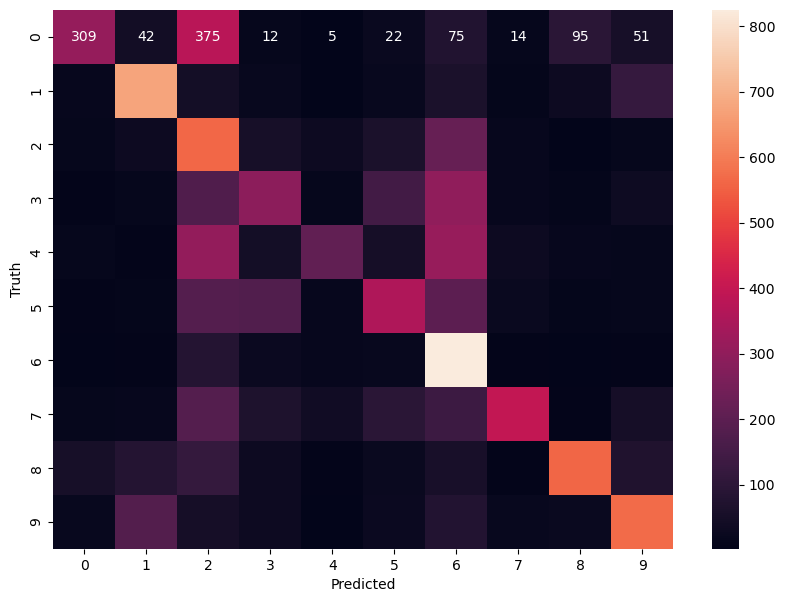

In [31]:
import seaborn as sn
y_predicted = model.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[309,  42, 375,  12,   5,  22,  75,  14,  95,  51],
       [ 17, 676,  46,  21,   2,  19,  60,  11,  30, 118],
       [ 12,  28, 564,  53,  28,  60, 220,  17,   4,  14],
       [  6,  13, 175, 292,  12, 144, 299,  16,  11,  32],
       [ 12,   8, 306,  45, 208,  49, 313,  30,  16,  13],
       [  7,  10, 184, 177,  18, 357, 200,  23,  11,  13],
       [  2,   8,  82,  27,  17,  21, 825,   6,   5,   7],
       [ 14,  17, 184,  67,  40,  93, 133, 396,   7,  49],
       [ 53,  80, 115,  30,   7,  24,  55,   6, 560,  70],
       [ 19, 182,  49,  30,   5,  26,  77,  20,  24, 568]], dtype=int32)>

In [35]:
import seaborn as sn
y_predicted = model.predict(X_train_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels)
cm

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1741,  251, 1739,   94,   50,   94,  327,   60,  355,  289],
       [  84, 3718,  161,   73,   25,   39,  257,   45,  107,  491],
       [  44,   66, 3046,  200,  133,  231, 1095,   82,   37,   66],
       [  29,   84,  817, 1782,   48,  629, 1414,   48,   57,   92],
       [  70,   46, 1479,  212, 1270,  187, 1486,  129,   54,   67],
       [  16,   67,  882,  702,   63, 1996, 1100,   95,   38,   41],
       [   2,   35,  399,  146,   77,   96, 4187,   17,   16,   25],
       [  61,   53,  845,  266,  213,  327,  624, 2404,   35,  172],
       [ 235,  363,  616,   98,   37,  101,  210,    9, 3021,  310],
       [  78,  752,  236,  136,   14,  120,  354,   89,   86, 3135]],
      dtype=int32)>